## Title: M6 Nonlinear Optimization Assignment
## Author: Leo Genders
## Date: 11 August 2024

In [1]:
# importing all the needed libraries for the assignment to be more efficient
from IPython import display
import pandas as pd
import numpy as np
from gurobipy import *
import matplotlib.pyplot as plt

## 1) Model Formulation - Example 7.9

**Sets**\
$I$: set of investments

**Parameters**\
$r_i$: expected return of investment $i$ \
$r_{min}$: minimum allowable expected return \
$c_{i,j}$: covariance between investments $i$ and $j$ \
mean annual return of the portfolio needs to be at least 0.12 \
investment weights must total to 100% or 1 

**Decision Variables** \
$x_i$: portfolio allocation weight for investment $i$ that must total to 1


**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\displaystyle \underset{x}{\min} & \underset{i\in I, j\in I}{\sum}c_{i,j} x_i x_j \\
\textrm{s.t.} & \underset{i \in I}{\sum} r_ix_i & \geq & r_{min} & & \\
& \underset{i \in I}{\sum} x_i & = & 1 &  \\
& x_i & \geq & 0 & \forall i \in I &
\end{matrix}
\end{equation*}

## 2) Excel Prototype - Example 7.9

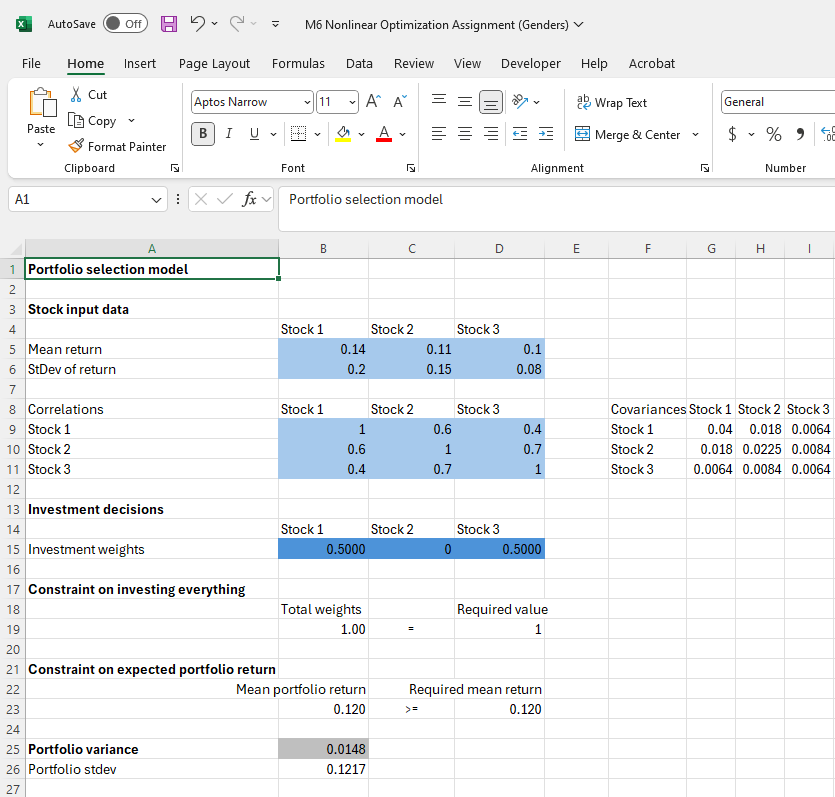

In [2]:
display.Image("ex79_excel_model.png")

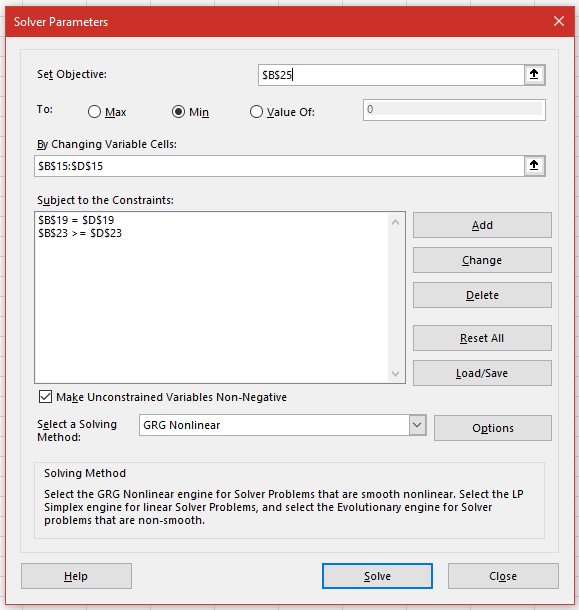

In [3]:
display.Image("ex79_excel_solver.png")

## 3) Python Prototype - Example 7.9

In [4]:
# assign average, standard deviation values
idx = range(3) # index range
avg = pd.Series([0.14,0.11,0.1]) # this is r
stdev = pd.Series([0.2,0.15,0.08])
rmin = 0.12 # assign rmin value
cor = pd.DataFrame([[1,0.6,0.4], [0.6,1,0.7], [0.4,0.7,1]], columns=idx)
# initialize cov as a copy of cor so it has same shape and indices
cov = cor
for i in idx:
    for j in idx:
        cov.iloc[i,j] = stdev.iloc[i] * cor.iloc[i,j] * stdev.iloc[j]

# initialize model
m = Model('ex79')

# decision variables - include non-neg in lb=0, ub is 1 bc cannot be larger that 1 for all weights, trying a as index
stock_labels = idx
x = pd.Series(m.addVars(stock_labels), index = stock_labels)
m.update()

# objective function - minimize risk
# saving as portfolio_risk to use later
portfolio_risk = x @ cov @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)
m.update()

# constraint to ensure the mean annual return of the portfolio must be at least 0.12
# saving as exp_return to use value later
exp_return = quicksum(x[i]*avg[i] for i in stock_labels) 
return_const = m.addConstr(exp_return >= rmin, 'ExpReturn')
m.update()

# constraint to ensure the total investment weights are equal to 1
m.addConstr(x.sum() == 1, 'Sumto1')
m.update()

# solve
m.optimize()

# save return for later
min_ret = exp_return.getValue()

print('The minimum possible risk of the portfolio is %.3f.' % np.sqrt(portfolio_risk.getValue()))
print('The expected return of the minimum risk portfolio is %.3f.' % exp_return.getValue())
print('The portfolio allocation is (%.3f, %.3f, %.3f).' % (x[0].x,x[1].x,x[2].x))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x2908e952
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 8e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
Presolve time: 0.02s
Presolved: 2 rows, 3 columns, 6 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 6.000e+00
 Factor NZ  : 1.000e+01
 Factor Ops : 3.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter   

In [5]:
###### Work Area #####

In [6]:
# assign average, standard deviation values
avg = pd.Series([0.14,0.11,0.1], copy=False)
stdev = pd.Series([0.2,0.15,0.08])

In [7]:
print(x.shape)

(3,)


In [8]:
print(idx)

range(0, 3)


In [9]:
print(cov.shape)

(3, 3)


In [10]:
avg.index

RangeIndex(start=0, stop=3, step=1)

In [11]:
cov.index

RangeIndex(start=0, stop=3, step=1)

In [12]:
stdev.index

RangeIndex(start=0, stop=3, step=1)

In [13]:
###### Work Area #####

**Citation for storing a matrix as a Pandas Dataframe**: (2024,July 11). *Convert Numpy Array to Dataframe*. geeksforgeeks.org. Retrieved August 7, 2024 from https://www.geeksforgeeks.org/convert-numpy-array-to-dataframe/

## 4) Data Wrangling - NASDAQ

Calculate the average monthly returns for many different NASDAQ stocks over several years as a Pandas DataFrame

In [14]:
# read in the data
n_df = pd.read_excel('M6 Nonlinear Optimization Assignment (Genders).xlsx', sheet_name='nasdaq returns')
# view nasdaq df
n_df

,Unnamed: 0,AAON,AAPL,ABAX,ABCB,ABFS,ABMD,ACAT,ACCL,ACET,...,YHOO,YORW,ZBRA,ZEUS,ZIGO,ZION,ZOLL,ZOLT,ZRAN,ZRBA
0,1,0.080678,-0.010680,0.047742,-0.074040,-0.031046,0.579800,-0.006036,0.679187,-0.040000,...,-0.272871,0.000000,0.014570,-0.028078,0.093439,0.006983,0.022857,0.042841,-0.270080,0.000000
1,2,0.066250,0.102115,0.035990,-0.048170,-0.212677,0.332252,0.024291,0.793885,-0.068182,...,-0.500094,-0.080023,0.110444,0.000000,0.664545,-0.098845,0.350649,0.156692,0.090909,0.445578
2,3,0.032941,0.145496,0.039702,0.018219,0.091476,-0.405461,0.018887,-0.289855,-0.121951,...,0.088127,-0.102857,-0.234069,-0.058824,0.293219,-0.178931,-0.026221,-0.142326,-0.024935,-0.152955
3,4,0.183099,-0.084428,-0.162353,-0.024679,0.189338,-0.060000,-0.012758,-0.156513,0.181818,...,-0.228148,0.062680,0.145729,0.266667,-0.463158,-0.059170,-0.141942,-0.123620,-0.108214,-0.333333
4,5,0.130334,-0.327300,-0.147427,-0.006036,-0.153846,0.060732,0.081489,-0.480535,0.076923,...,-0.160965,0.008065,-0.151344,-0.076923,0.246020,0.125241,0.086957,-0.107143,-0.215000,-0.168033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,0.060976,0.018159,0.001883,0.007812,0.112273,0.096689,0.160976,-0.043333,-0.051064,...,0.003434,-0.068565,0.012561,0.031011,0.053375,0.270115,-0.029158,-0.078140,-0.050687,0.904762
116,117,-0.039234,0.103339,0.014026,0.122449,-0.052831,0.175545,0.004267,0.015762,-0.006006,...,0.228276,-0.135910,0.043041,0.076548,0.021084,0.021023,0.201563,0.141304,0.034111,0.227723
117,118,-0.101297,0.016995,-0.141783,-0.170423,-0.127703,-0.067971,-0.152639,-0.055652,-0.159332,...,-0.099150,0.008652,-0.035122,-0.111657,0.020679,-0.217680,-0.095903,-0.153042,-0.226003,-0.022000
118,119,0.041804,0.053267,-0.024740,0.105351,-0.047582,-0.073384,0.101142,-0.038532,-0.061261,...,-0.049524,0.036958,0.061428,0.098218,-0.059163,-0.075896,0.263347,-0.004435,0.052995,-0.041237


In [15]:
# drop the unnamed column
n_df = n_df.set_index('Unnamed: 0')
n_df = n_df.reset_index(drop=True)
n_df

,AAON,AAPL,ABAX,ABCB,ABFS,ABMD,ACAT,ACCL,ACET,ACGL,...,YHOO,YORW,ZBRA,ZEUS,ZIGO,ZION,ZOLL,ZOLT,ZRAN,ZRBA
0,0.080678,-0.010680,0.047742,-0.074040,-0.031046,0.579800,-0.006036,0.679187,-0.040000,0.152088,...,-0.272871,0.000000,0.014570,-0.028078,0.093439,0.006983,0.022857,0.042841,-0.270080,0.000000
1,0.066250,0.102115,0.035990,-0.048170,-0.212677,0.332252,0.024291,0.793885,-0.068182,0.051724,...,-0.500094,-0.080023,0.110444,0.000000,0.664545,-0.098845,0.350649,0.156692,0.090909,0.445578
2,0.032941,0.145496,0.039702,0.018219,0.091476,-0.405461,0.018887,-0.289855,-0.121951,0.100874,...,0.088127,-0.102857,-0.234069,-0.058824,0.293219,-0.178931,-0.026221,-0.142326,-0.024935,-0.152955
3,0.183099,-0.084428,-0.162353,-0.024679,0.189338,-0.060000,-0.012758,-0.156513,0.181818,-0.067273,...,-0.228148,0.062680,0.145729,0.266667,-0.463158,-0.059170,-0.141942,-0.123620,-0.108214,-0.333333
4,0.130334,-0.327300,-0.147427,-0.006036,-0.153846,0.060732,0.081489,-0.480535,0.076923,0.000000,...,-0.160965,0.008065,-0.151344,-0.076923,0.246020,0.125241,0.086957,-0.107143,-0.215000,-0.168033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.060976,0.018159,0.001883,0.007812,0.112273,0.096689,0.160976,-0.043333,-0.051064,0.042857,...,0.003434,-0.068565,0.012561,0.031011,0.053375,0.270115,-0.029158,-0.078140,-0.050687,0.904762
116,-0.039234,0.103339,0.014026,0.122449,-0.052831,0.175545,0.004267,0.015762,-0.006006,0.039077,...,0.228276,-0.135910,0.043041,0.076548,0.021084,0.021023,0.201563,0.141304,0.034111,0.227723
117,-0.101297,0.016995,-0.141783,-0.170423,-0.127703,-0.067971,-0.152639,-0.055652,-0.159332,0.002381,...,-0.099150,0.008652,-0.035122,-0.111657,0.020679,-0.217680,-0.095903,-0.153042,-0.226003,-0.022000
118,0.041804,0.053267,-0.024740,0.105351,-0.047582,-0.073384,0.101142,-0.038532,-0.061261,0.037862,...,-0.049524,0.036958,0.061428,0.098218,-0.059163,-0.075896,0.263347,-0.004435,0.052995,-0.041237


In [16]:
# get the means and store as var named avg
avg = n_df.mean()
# view avg
avg

AAON    0.012440
AAPL    0.018451
ABAX    0.022386
ABCB    0.001089
ABFS    0.012239
          ...   
ZION   -0.008128
ZOLL    0.006734
ZOLT    0.026389
ZRAN    0.006497
ZRBA    0.027955
Length: 1158, dtype: float64

In [17]:
# get the covariance matrix and store as var named cov
cov = n_df.cov()
# view cov
cov

,AAON,AAPL,ABAX,ABCB,ABFS,ABMD,ACAT,ACCL,ACET,ACGL,...,YHOO,YORW,ZBRA,ZEUS,ZIGO,ZION,ZOLL,ZOLT,ZRAN,ZRBA
AAON,0.013376,0.003254,0.002771,0.003015,0.002034,-0.001239,0.003649,0.003190,0.004369,0.001110,...,0.003532,0.002542,0.003865,0.004400,0.004782,0.000834,0.004078,0.008329,0.008298,0.004020
AAPL,0.003254,0.023868,0.004237,0.001578,0.002114,0.002250,0.003812,0.006375,0.000304,0.000825,...,0.009827,0.002796,0.005158,0.007150,0.003692,-0.002061,0.003755,0.006252,0.008997,0.008563
ABAX,0.002771,0.004237,0.019898,0.002158,0.002370,0.005486,0.003223,0.005139,0.001446,0.001253,...,0.005938,0.001726,0.002125,0.005625,0.006924,0.001486,0.002846,0.008673,0.007389,0.002822
ABCB,0.003015,0.001578,0.002158,0.011670,0.003913,0.004294,0.003478,0.002404,0.003627,0.002430,...,0.002387,0.001425,0.001605,0.002347,0.005925,0.004429,0.005210,0.005371,0.002036,-0.000493
ABFS,0.002034,0.002114,0.002370,0.003913,0.015009,0.003271,0.003639,0.000500,0.002372,0.001904,...,0.004761,0.000795,0.003248,0.006494,0.001719,0.004115,0.001212,-0.000174,0.002945,-0.000287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,0.000834,-0.002061,0.001486,0.004429,0.004115,0.002543,0.003517,-0.000529,0.003139,0.000811,...,-0.000121,0.000227,0.000424,0.000410,0.003518,0.010976,0.001140,0.002477,0.002296,-0.000173
ZOLL,0.004078,0.003755,0.002846,0.005210,0.001212,0.005274,0.003235,0.004292,0.003212,0.001676,...,0.002123,0.000377,0.000779,0.005141,0.005769,0.001140,0.017812,0.006139,0.004855,0.000820
ZOLT,0.008329,0.006252,0.008673,0.005371,-0.000174,-0.001499,0.006012,0.009099,0.003296,0.004000,...,0.006037,0.005609,0.006336,0.005373,0.011408,0.002477,0.006139,0.068824,0.010059,0.001185
ZRAN,0.008298,0.008997,0.007389,0.002036,0.002945,-0.000730,0.006441,0.015754,0.007887,0.000937,...,0.013821,0.004128,0.006808,0.007177,0.026298,0.002296,0.004855,0.010059,0.045640,0.004319


Print out the first five rows of avg and cov

In [18]:
print("The first five rows of the average return vector are:")
print(avg.head())
print("The first five rows of the covariance matrix are:")
print(cov.head())

The first five rows of the average return vector are:
AAON    0.012440
AAPL    0.018451
ABAX    0.022386
ABCB    0.001089
ABFS    0.012239
dtype: float64
The first five rows of the covariance matrix are:
          AAON      AAPL      ABAX      ABCB      ABFS      ABMD      ACAT  \
AAON  0.013376  0.003254  0.002771  0.003015  0.002034 -0.001239  0.003649   
AAPL  0.003254  0.023868  0.004237  0.001578  0.002114  0.002250  0.003812   
ABAX  0.002771  0.004237  0.019898  0.002158  0.002370  0.005486  0.003223   
ABCB  0.003015  0.001578  0.002158  0.011670  0.003913  0.004294  0.003478   
ABFS  0.002034  0.002114  0.002370  0.003913  0.015009  0.003271  0.003639   

          ACCL      ACET      ACGL  ...      YHOO      YORW      ZBRA  \
AAON  0.003190  0.004369  0.001110  ...  0.003532  0.002542  0.003865   
AAPL  0.006375  0.000304  0.000825  ...  0.009827  0.002796  0.005158   
ABAX  0.005139  0.001446  0.001253  ...  0.005938  0.001726  0.002125   
ABCB  0.002404  0.003627  0.002430 

## 5) Python Model - NASDAQ (Min Risk)

## Model Formulation - NASDAQ (Min Risk)

**Sets**\
$I$: set of investments

**Parameters**\
$r_i$: expected return of investment $i$ \
$r_{min}$: minimum allowable expected return, 0 in this problem \
$c_{i,j}$: covariance between investments $i$ and $j$ \
investment weights must total to 100% or 1 

**Decision Variables** \
$x_i$: portfolio allocation weight for investment $i$ that must total to 1


**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\displaystyle \underset{x}{\min} & \underset{i\in I, j\in I}{\sum}c_{i,j} x_i x_j \\
\textrm{s.t.} & \underset{i \in I}{\sum} x_i & = & 1  \\
& \underset{i \in I}{\sum} r_ix_i & \geq & r_{min} & & \\
& x_i & \geq & 0 & \forall i \in I & \\
\end{matrix}
\end{equation*}

## Python Model - NASDAQ (Min Risk)

In [19]:
# low risk, low expected return
# avg and cov defined above in part 4
avg = n_df.mean()
cov = n_df.cov()
idx = range(1158) # index range
rmin = 0

# initialize model
m = Model('Minimum Risk Portfolio with Expected Return')

# decision variables: with labels for each stock
stock_labels = idx
x = pd.Series(m.addVars(stock_labels), index=stock_labels)
m.update()

# objective function: minimize risk
# getting matrices not aligned error, check x and cov below
portfolio_risk = x @ cov.to_numpy() @ x # <-- save this expression so we can get its value later
m.setObjective(portfolio_risk, GRB.MINIMIZE)
m.update()

# constraints:
# weights sum to 1
m.addConstr(x.sum() == 1)
#expected return
exp_return = quicksum(avg[i]*x[i] for i in stock_labels) # <-- save this expression so we can get its value later
return_const = m.addConstr(exp_return >= rmin,'ExpReturn')
m.update()

# optimize model, finds minimum risk portfolio with constraint
m.optimize()

# save return for later
min_ret = exp_return.getValue()

print('The minimum possible risk of the portfolio is %.3f.' % np.sqrt(portfolio_risk.getValue()))
print('The expected return of the minimum risk portfolio is %.3f.' % exp_return.getValue())

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x26874f07
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.17s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal   

In [20]:
###### Work Area #####

In [21]:
print(x.shape)

(1158,)


In [22]:
x

0            <gurobi.Var C0 (value 5.93630231207954e-09)>
1           <gurobi.Var C1 (value 5.126608570644427e-09)>
2            <gurobi.Var C2 (value 4.37527445520694e-09)>
3           <gurobi.Var C3 (value 3.329603923289689e-09)>
4           <gurobi.Var C4 (value 4.588654881215337e-09)>
                              ...                        
1153     <gurobi.Var C1153 (value 7.777903444578104e-09)>
1154     <gurobi.Var C1154 (value 4.880152472454593e-09)>
1155    <gurobi.Var C1155 (value 2.0752360222515087e-09)>
1156      <gurobi.Var C1156 (value 1.86781809592381e-09)>
1157     <gurobi.Var C1157 (value 8.074050432981292e-09)>
Length: 1158, dtype: object

In [23]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1158 entries, 0 to 1157
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1158 non-null   object
dtypes: object(1)
memory usage: 9.2+ KB


In [24]:
print(cov.shape)

(1158, 1158)


In [25]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1158 entries, AAON to ZRBA
Columns: 1158 entries, AAON to ZRBA
dtypes: float64(1158)
memory usage: 10.3+ MB


In [26]:
cov.columns

Index(['AAON', 'AAPL', 'ABAX', 'ABCB', 'ABFS', 'ABMD', 'ACAT', 'ACCL', 'ACET',
       'ACGL',
       ...
       'YHOO', 'YORW', 'ZBRA', 'ZEUS', 'ZIGO', 'ZION', 'ZOLL', 'ZOLT', 'ZRAN',
       'ZRBA'],
      dtype='object', length=1158)

In [27]:
cov

,AAON,AAPL,ABAX,ABCB,ABFS,ABMD,ACAT,ACCL,ACET,ACGL,...,YHOO,YORW,ZBRA,ZEUS,ZIGO,ZION,ZOLL,ZOLT,ZRAN,ZRBA
AAON,0.013376,0.003254,0.002771,0.003015,0.002034,-0.001239,0.003649,0.003190,0.004369,0.001110,...,0.003532,0.002542,0.003865,0.004400,0.004782,0.000834,0.004078,0.008329,0.008298,0.004020
AAPL,0.003254,0.023868,0.004237,0.001578,0.002114,0.002250,0.003812,0.006375,0.000304,0.000825,...,0.009827,0.002796,0.005158,0.007150,0.003692,-0.002061,0.003755,0.006252,0.008997,0.008563
ABAX,0.002771,0.004237,0.019898,0.002158,0.002370,0.005486,0.003223,0.005139,0.001446,0.001253,...,0.005938,0.001726,0.002125,0.005625,0.006924,0.001486,0.002846,0.008673,0.007389,0.002822
ABCB,0.003015,0.001578,0.002158,0.011670,0.003913,0.004294,0.003478,0.002404,0.003627,0.002430,...,0.002387,0.001425,0.001605,0.002347,0.005925,0.004429,0.005210,0.005371,0.002036,-0.000493
ABFS,0.002034,0.002114,0.002370,0.003913,0.015009,0.003271,0.003639,0.000500,0.002372,0.001904,...,0.004761,0.000795,0.003248,0.006494,0.001719,0.004115,0.001212,-0.000174,0.002945,-0.000287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,0.000834,-0.002061,0.001486,0.004429,0.004115,0.002543,0.003517,-0.000529,0.003139,0.000811,...,-0.000121,0.000227,0.000424,0.000410,0.003518,0.010976,0.001140,0.002477,0.002296,-0.000173
ZOLL,0.004078,0.003755,0.002846,0.005210,0.001212,0.005274,0.003235,0.004292,0.003212,0.001676,...,0.002123,0.000377,0.000779,0.005141,0.005769,0.001140,0.017812,0.006139,0.004855,0.000820
ZOLT,0.008329,0.006252,0.008673,0.005371,-0.000174,-0.001499,0.006012,0.009099,0.003296,0.004000,...,0.006037,0.005609,0.006336,0.005373,0.011408,0.002477,0.006139,0.068824,0.010059,0.001185
ZRAN,0.008298,0.008997,0.007389,0.002036,0.002945,-0.000730,0.006441,0.015754,0.007887,0.000937,...,0.013821,0.004128,0.006808,0.007177,0.026298,0.002296,0.004855,0.010059,0.045640,0.004319


In [28]:
cov.iloc[0:]

,AAON,AAPL,ABAX,ABCB,ABFS,ABMD,ACAT,ACCL,ACET,ACGL,...,YHOO,YORW,ZBRA,ZEUS,ZIGO,ZION,ZOLL,ZOLT,ZRAN,ZRBA
AAON,0.013376,0.003254,0.002771,0.003015,0.002034,-0.001239,0.003649,0.003190,0.004369,0.001110,...,0.003532,0.002542,0.003865,0.004400,0.004782,0.000834,0.004078,0.008329,0.008298,0.004020
AAPL,0.003254,0.023868,0.004237,0.001578,0.002114,0.002250,0.003812,0.006375,0.000304,0.000825,...,0.009827,0.002796,0.005158,0.007150,0.003692,-0.002061,0.003755,0.006252,0.008997,0.008563
ABAX,0.002771,0.004237,0.019898,0.002158,0.002370,0.005486,0.003223,0.005139,0.001446,0.001253,...,0.005938,0.001726,0.002125,0.005625,0.006924,0.001486,0.002846,0.008673,0.007389,0.002822
ABCB,0.003015,0.001578,0.002158,0.011670,0.003913,0.004294,0.003478,0.002404,0.003627,0.002430,...,0.002387,0.001425,0.001605,0.002347,0.005925,0.004429,0.005210,0.005371,0.002036,-0.000493
ABFS,0.002034,0.002114,0.002370,0.003913,0.015009,0.003271,0.003639,0.000500,0.002372,0.001904,...,0.004761,0.000795,0.003248,0.006494,0.001719,0.004115,0.001212,-0.000174,0.002945,-0.000287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION,0.000834,-0.002061,0.001486,0.004429,0.004115,0.002543,0.003517,-0.000529,0.003139,0.000811,...,-0.000121,0.000227,0.000424,0.000410,0.003518,0.010976,0.001140,0.002477,0.002296,-0.000173
ZOLL,0.004078,0.003755,0.002846,0.005210,0.001212,0.005274,0.003235,0.004292,0.003212,0.001676,...,0.002123,0.000377,0.000779,0.005141,0.005769,0.001140,0.017812,0.006139,0.004855,0.000820
ZOLT,0.008329,0.006252,0.008673,0.005371,-0.000174,-0.001499,0.006012,0.009099,0.003296,0.004000,...,0.006037,0.005609,0.006336,0.005373,0.011408,0.002477,0.006139,0.068824,0.010059,0.001185
ZRAN,0.008298,0.008997,0.007389,0.002036,0.002945,-0.000730,0.006441,0.015754,0.007887,0.000937,...,0.013821,0.004128,0.006808,0.007177,0.026298,0.002296,0.004855,0.010059,0.045640,0.004319


In [29]:
print(type(x))

<class 'pandas.core.series.Series'>


In [30]:
print(type(cov))
# needs to be an array like problem #3 above - currently df

<class 'pandas.core.frame.DataFrame'>


**Citation for dataframe to array**: (2023, January 5). *Pandas Datafram.to_numpy() - Convert dataframe to Numpy array*. geeksforgeeks.org. Retrieved August 9, 2024 from https://www.geeksforgeeks.org/pandas-dataframe-to_numpy-convert-dataframe-to-numpy-array/

In [31]:
cov.to_numpy()

array([[0.01337574, 0.00325441, 0.00277063, ..., 0.00832916, 0.00829814,
        0.00402047],
       [0.00325441, 0.02386759, 0.00423698, ..., 0.00625241, 0.00899737,
        0.00856268],
       [0.00277063, 0.00423698, 0.01989788, ..., 0.00867266, 0.00738901,
        0.00282186],
       ...,
       [0.00832916, 0.00625241, 0.00867266, ..., 0.06882422, 0.01005895,
        0.00118538],
       [0.00829814, 0.00899737, 0.00738901, ..., 0.01005895, 0.04564036,
        0.00431925],
       [0.00402047, 0.00856268, 0.00282186, ..., 0.00118538, 0.00431925,
        0.0564833 ]])

In [32]:
print(idx)

range(0, 1158)


In [33]:
###### Work Area #####

## 6) Python Model - NASDAQ (Largest Return)

## Model Formulation - NASDAQ (Largest Return)

**Sets**\
$I$: set of investments

**Parameters**\
$r_i$: expected return of investment $i$ \
$r_{min}$: minimum allowable expected return, max of the avg returns in this problem \
$c_{i,j}$: covariance between investments $i$ and $j$ \
investment weights must total to 100% or 1 

**Decision Variables** \
$x_i$: portfolio allocation weight for investment $i$ that must total to 1


**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\displaystyle \underset{x}{\min} & \underset{i\in I, j\in I}{\sum}c_{i,j} x_i x_j \\
\textrm{s.t.} & \underset{i \in I}{\sum} x_i & = & 1  \\
& \underset{i \in I}{\sum} r_ix_i & \geq & r_{min} & & \\
& x_i & \geq & 0 & \forall i \in I & \\
\end{matrix}
\end{equation*}

## Python Model - NASDAQ (Largest Return)

In [34]:
# high risk, high expected return
# set the minimum return
rmin = avg.max()

# set the return constraint RHS to the largest expected return
return_const.rhs = rmin # <-- reset the RHS value to what we want here

# re-optimize model with the new constraint RHS
m.optimize()

# save return for later when graphing efficient frontier
max_ret = exp_return.getValue()

# print the results
print('The maximum return of the portfolio is %.3f:' % exp_return.getValue())
print('The risk of the maximum return portfolio is %.3f:' % np.sqrt(portfolio_risk.getValue()))

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x78dbae78
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-02, 1e+00]
Presolve time: 0.13s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal   

## 7) Efficient Frontier

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x99da5dc8
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-03, 1e+00]
Presolve time: 0.14s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal   

Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.95405873e-19 -9.95405873e-19  1.15e+06 4.53e-09  1.00e+06     0s
   1   4.76913823e+02 -4.91640027e+02  5.95e+04 2.34e-10  5.17e+04     0s
   2   1.76832236e+02 -1.92258459e+02  5.88e+02 2.31e-12  5.32e+02     0s
   3   1.39388954e+00 -1.76388188e+01  3.95e+00 1.60e-14  4.62e+00     0s
   4   6.29443148e-02 -1.07435502e+01  3.95e-06 4.44e-16  5.97e-01     0s
   5   6.21161971e-02 -8.23702211e-02  5.27e-08 5.55e-17  7.98e-03     0s
   6   3.12703112e-02 -9.04124948e-02  3.59e-08 5.55e-17  6.72e-03     0s
   7   9.91945067e-03 -1.12606953e-02  1.70e-09

   4   6.33785242e-02 -1.06457923e+01  3.95e-06 5.55e-16  5.91e-01     0s
   5   6.25443877e-02 -7.92967863e-02  5.24e-08 1.11e-16  7.83e-03     0s
   6   3.09360024e-02 -8.71391971e-02  3.46e-08 1.11e-16  6.52e-03     0s
   7   1.78746423e-02 -2.59967328e-02  1.07e-08 5.55e-17  2.42e-03     0s
   8   5.88166507e-03 -1.75306514e-02  1.38e-14 1.55e-15  1.29e-03     1s
   9   3.89215074e-03 -2.14851256e-03  4.23e-16 8.88e-16  3.34e-04     1s
  10   2.36196438e-03 -5.51031977e-04  9.99e-16 4.44e-16  1.61e-04     1s
  11   1.70820589e-03  6.22449204e-04  1.73e-14 3.47e-16  6.00e-05     1s
  12   1.42125927e-03  9.57716516e-04  2.87e-15 2.22e-16  2.56e-05     1s
  13   1.23892490e-03  1.08224795e-03  5.77e-15 2.78e-16  8.65e-06     1s
  14   1.14251544e-03  1.12460365e-03  5.66e-14 2.22e-16  9.89e-07     1s
  15   1.12797705e-03  1.12774467e-03  1.97e-13 2.53e-16  1.28e-08     1s
  16   1.12776021e-03  1.12775906e-03  1.52e-13 1.94e-16  6.33e-11     1s

Barrier solved model in 16 iterations

  12   4.73010994e-03  2.19541023e-03  3.72e-14 1.10e-15  1.40e-04     1s
  13   4.17543294e-03  2.95867284e-03  6.56e-14 5.55e-16  6.72e-05     1s
  14   3.87835321e-03  3.43686301e-03  5.66e-14 4.44e-16  2.44e-05     1s
  15   3.78839832e-03  3.53224701e-03  8.59e-14 4.44e-16  1.41e-05     1s
  16   3.59347778e-03  3.57322749e-03  7.17e-13 4.44e-16  1.12e-06     1s
  17   3.57469038e-03  3.57449353e-03  7.34e-13 5.55e-16  1.09e-08     1s
  18   3.57450044e-03  3.57450024e-03  2.15e-13 6.68e-16  1.10e-11     1s

Barrier solved model in 18 iterations and 0.80 seconds (0.06 work units)
Optimal objective 3.57450044e-03

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0x3e42f66e
Model has 671061 quadratic objective terms


Optimize a model with 2 rows, 1158 columns and 2316 nonzeros
Model fingerprint: 0xa846a6a5
Model has 671061 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-08, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-02, 1e+00]
Presolve time: 0.13s
Presolved: 2 rows, 1158 columns, 2316 nonzeros
Presolved model has 671061 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 119
 AA' NZ     : 7.260e+03
 Factor NZ  : 7.381e+03 (roughly 1 MB of memory)
 Factor Ops : 5.979e+05 (less than 1 second per iteration)
 Threads    : 6

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.93198422e-18 -3.93198422e-18  1.15e+06 1.00e-08  1.00e+06     0s
   1   4.76915397e+02 -4.91209995e+02  5.95e+04 5.18e-10  5.17e+04     0s
   2   1.76886328e+02 -1.91498711e+02  5.89e+02 5.12e-12  5.32e+02 

   4   1.61439197e-01 -1.15308781e+01  6.44e-01 6.66e-15  1.10e+00     1s
   5   2.05153846e-01 -3.62477457e+00  3.08e-01 3.22e-15  5.96e-01     1s
   6   2.64370367e-01 -1.44692703e+00  3.08e-07 2.22e-16  9.45e-02     1s
   7   2.57992108e-01  8.97317198e-02  3.00e-08 1.11e-16  9.29e-03     1s
   8   2.06949658e-01  1.11157386e-01  8.00e-10 1.11e-16  5.29e-03     1s
   9   1.69615857e-01  1.25607420e-01  2.36e-12 2.13e-14  2.43e-03     1s
  10   1.55559534e-01  1.38645183e-01  6.49e-12 1.42e-14  9.34e-04     1s
  11   1.51282435e-01  1.37957272e-01  3.05e-12 1.42e-14  7.36e-04     1s
  12   1.43711261e-01  1.43371227e-01  7.22e-12 1.42e-14  1.88e-05     1s
  13   1.43473519e-01  1.43473084e-01  1.47e-11 1.42e-14  2.40e-08     1s
  14   1.43473241e-01  1.43473240e-01  1.26e-11 2.13e-14  2.40e-11     1s

Barrier solved model in 14 iterations and 0.83 seconds (0.05 work units)
Optimal objective 1.43473241e-01

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.

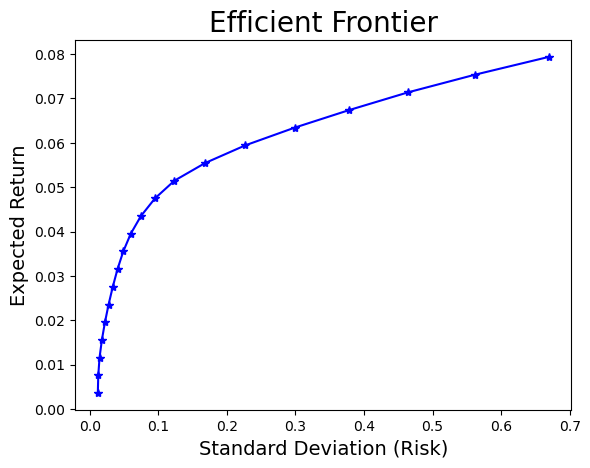

In [35]:
# loop over range of expected returns and solve
N = 20 # twenty points?
returns_list = np.linspace(min_ret, max_ret, N)
out_risk = []
out_return = []
for rmin in returns_list:
    return_const.rhs = rmin # <-- reset rmin each time through the loop
    m.optimize()
    out_risk.append(np.sqrt(portfolio_risk.getValue())) # need to get the value
    out_return.append(exp_return.getValue()) # get val here too

# plot the efficient frontier
plt.plot(out_risk, out_return,marker="*",color='blue')
plt.title('Efficient Frontier',fontsize=20)
plt.xlabel('Standard Deviation (Risk)',fontsize=14)
plt.ylabel('Expected Return',fontsize=14)
plt.show()

In [36]:
##### Work Area #####

In [37]:
print(returns_list)

[0.00362554 0.00761134 0.01159714 0.01558294 0.01956874 0.02355454
 0.02754034 0.03152614 0.03551194 0.03949774 0.04348354 0.04746934
 0.05145514 0.05544094 0.05942674 0.06341254 0.06739834 0.07138414
 0.07536994 0.07935574]


In [38]:
N = 20 # trying 20 points?
returns_list = np.linspace(min_ret, max_ret, N)
returns_list

array([0.00362554, 0.00761134, 0.01159714, 0.01558294, 0.01956874,
       0.02355454, 0.02754034, 0.03152614, 0.03551194, 0.03949774,
       0.04348354, 0.04746934, 0.05145514, 0.05544094, 0.05942674,
       0.06341254, 0.06739834, 0.07138414, 0.07536994, 0.07935574])

In [39]:
##### Work Area #####

## 8) Analysis

Examining the efficient frontier graph above, the data points indicate that as risk increases, so does the expected return. The relationship between Expected Return on the y-axis and Standard Deviation or Risk on the x-axis is not linear. In fact, the client can increase from the lowest risk of 0.00362554 with an expected return of 0.004. However, if we increase risk to 0.1, the client can experience an expected return of almost .05 which is significant improvement. 

If the client is willing to assume more risk, the expected return begins to level off, such that assuming maximum risk near 0.7 delivers an expected return of approximately .08. My recommendation is to assume a risk value of 0.1 to gain an expected return of .05. Accepting more risk is not a wise decision for the NASDAQ efficient frontier, although perhaps there are instances where the client is willing to place more risk to gain the marginal benefits of a higher expected return. 